# Group L MLG382 Assignment 1

## 1. Problem Statement: 
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while 
filling out the online application form. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem identifying the customer segments eligible for 
loan amounts to target these customers specifically. Here they have provided a partial dataset. 

## 2. Hypothesis Generation 

- Income: People with a higher income are more likely to get a loan
- Credit History: People with a good credit history are more likely to pay their loan back
- Loan Term: A higher chance of approval if the time period is not high
- Loan Amount: An amount that is not that high is more likely to be approved 
- Education: People who are educated are more likely to be aware of loans and get approved for them

## 3. Getting the System Ready and Loading Data

#### Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #For Data Visualization
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading Data

In [2]:
raw = pd.read_csv('./data-for-project-1/raw_data.csv')
validation = pd.read_csv('./data-for-project-1/validation.csv')

train_original = raw.copy()
test_original = validation.copy()


## 4. Understanding the Data

In [3]:
raw.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
validation.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
raw.dtypes #Print the data types for the raw data

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
raw.shape, validation.shape #Seeing how many rows and columns each has

((614, 13), (367, 12))

## Univariate Analysis

In [7]:
#Finding out the number of approved loans (target variable)
raw['Loan_Status'].value_counts(normalize=True) 

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

##### Target Variable

<Axes: xlabel='Loan_Status'>

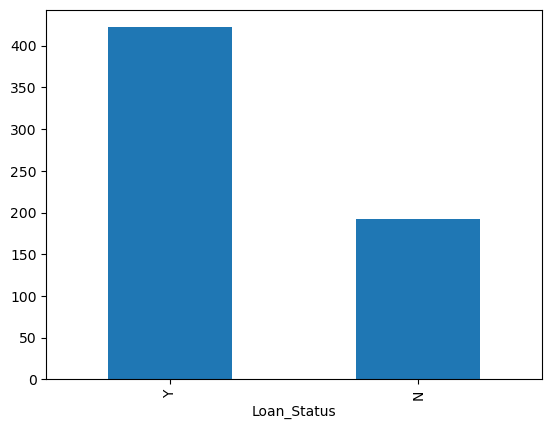

In [8]:
raw['Loan_Status'].value_counts().plot.bar()

422 of 614 people got approved with a loan

#### Independant Variable (All the Categories of object datatype)

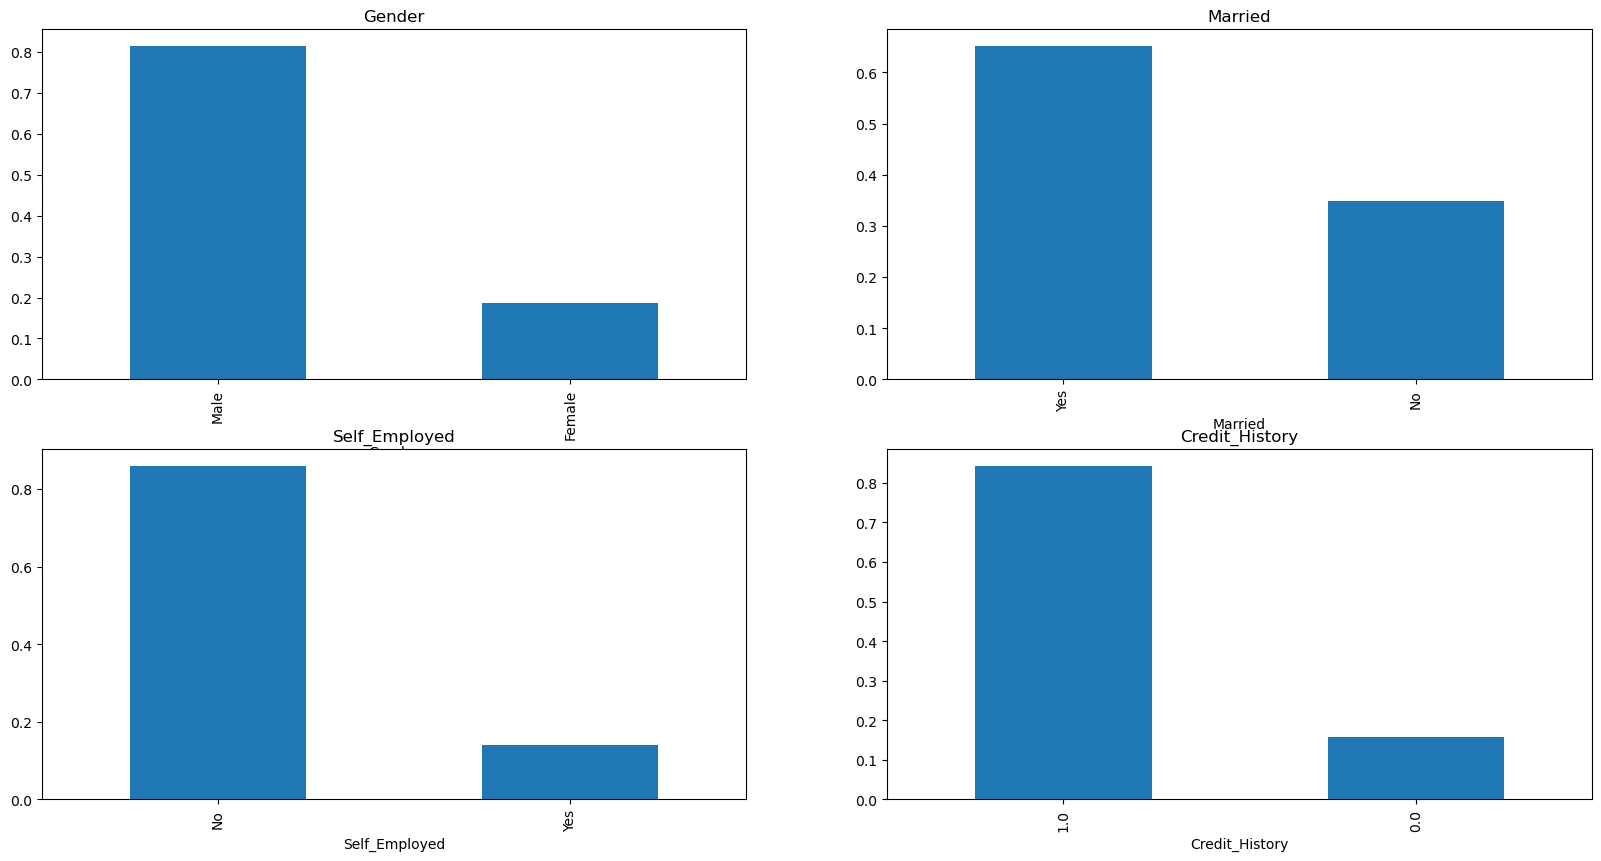

In [9]:
plt.figure(1) 
plt.subplot(221)
raw['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
raw['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
raw['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
raw['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be deduced from the above bar plots that:

- 80% of applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- About 15% of applicants in the dataset are self-employed.
- About 85% of applicants have repaid their debts.

#### Other Independant Variables

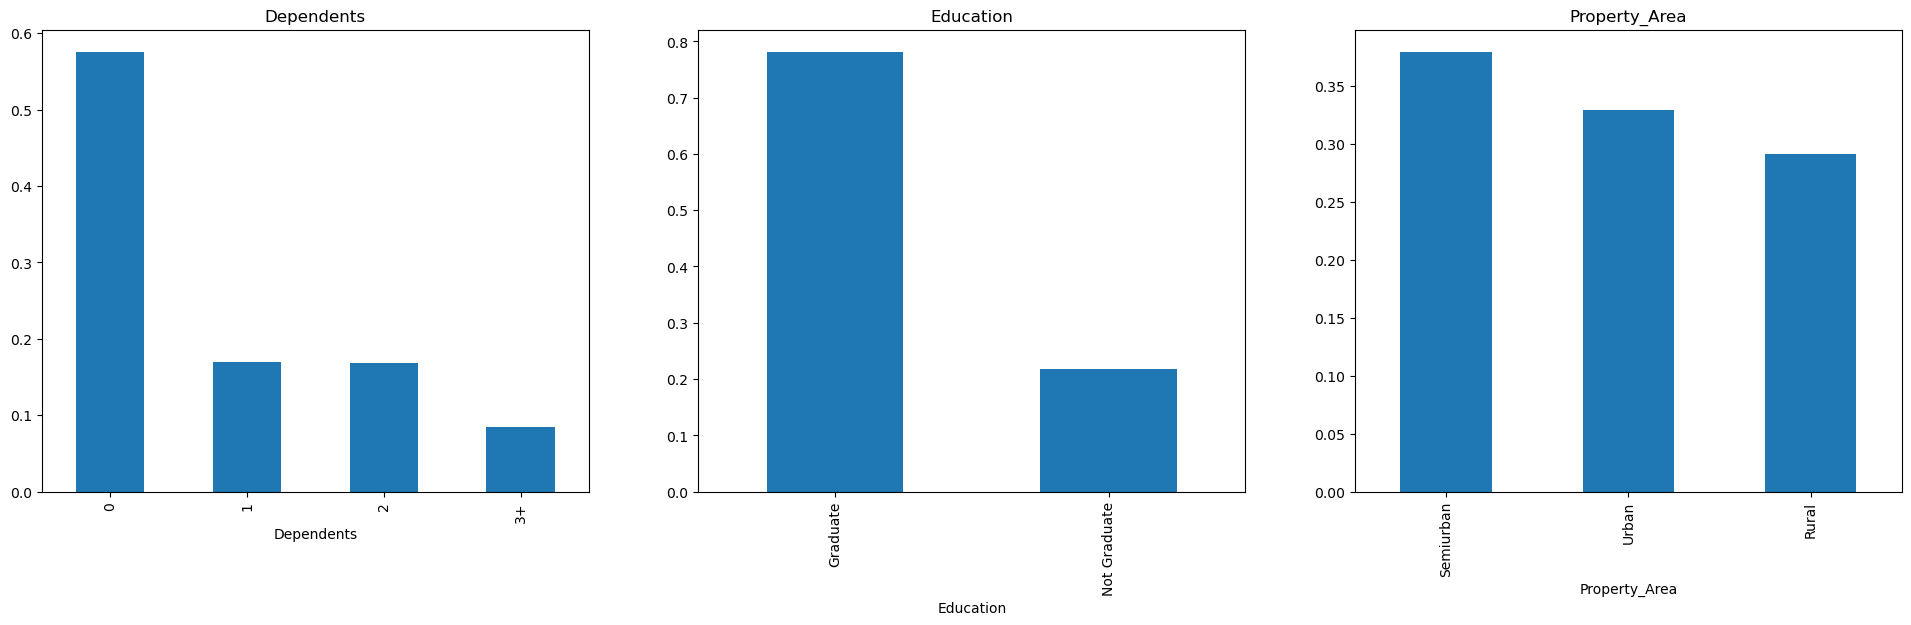

In [10]:
plt.figure(1) 
plt.subplot(131)
raw['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
raw['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
raw['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Information from these graphs deduce:

- Most of the applicants don’t have dependents.
- About 80% of the applicants are graduates.
- Most of the applicants are from semi-urban areas.

#### Independant Variable (All of type Integer)

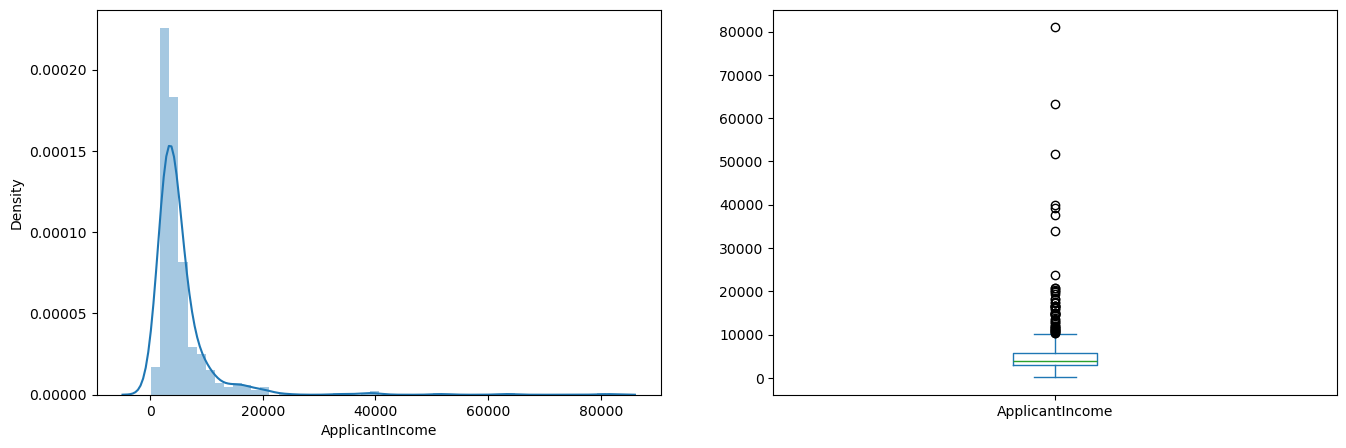

In [11]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(raw['ApplicantIncome']); 
plt.subplot(122) 
raw['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Most of the data in the distribution of applicant income are towards the left which means it is not normally distributed

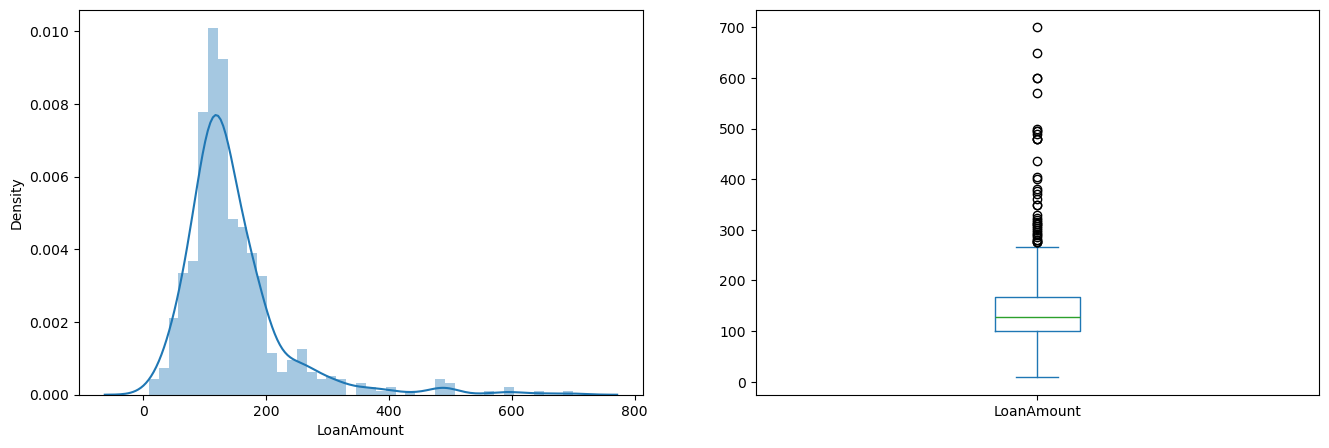

In [12]:
plt.figure(1) 
plt.subplot(121)
df=raw.dropna() 
sns.distplot(raw['LoanAmount']); 
plt.subplot(122)
raw['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

A lot of outliers are present


## Bivariate Analysis

#### Categorical Independent Variable vs Target Variable

<Axes: xlabel='Gender'>

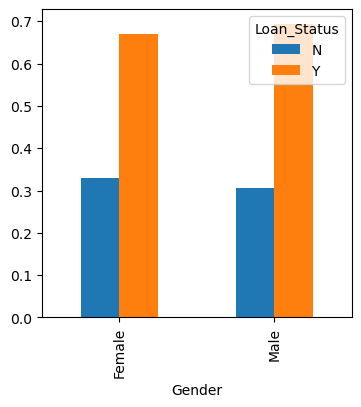

In [13]:
Gender=pd.crosstab(raw['Gender'],raw['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

The Loan Status is about the same for both male and female

#### Remaining categorical variables vs the target variables.

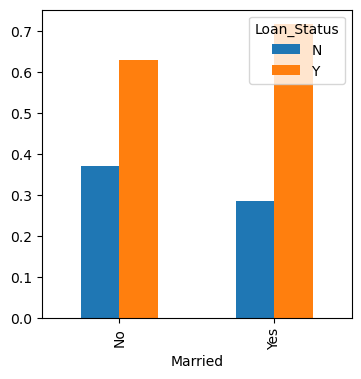

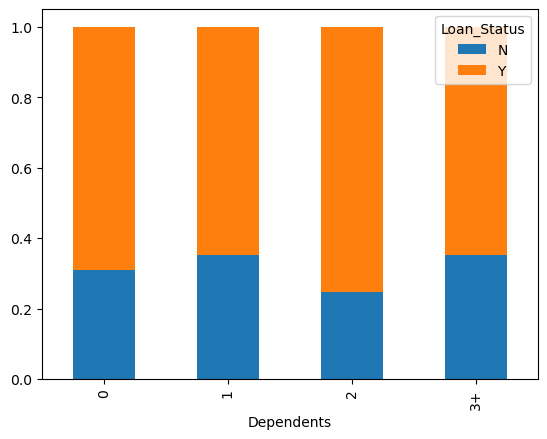

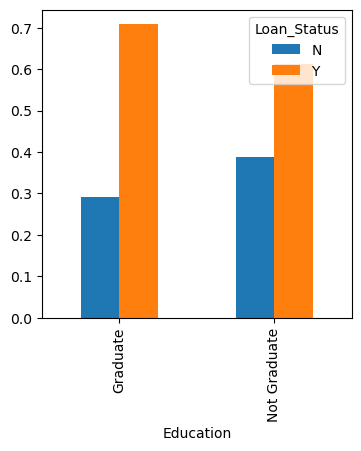

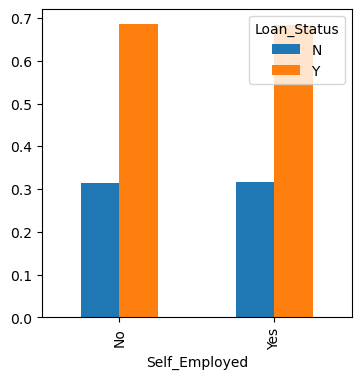

In [14]:
Married=pd.crosstab(raw['Married'],raw['Loan_Status']) 
Dependents=pd.crosstab(raw['Dependents'],raw['Loan_Status']) 
Education=pd.crosstab(raw['Education'],raw['Loan_Status']) 
Self_Employed=pd.crosstab(raw['Self_Employed'],raw['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

- The proportion of married applicants is higher for the approved loans.
- The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

#### Remaining categorical independent variables and Loan_Status.

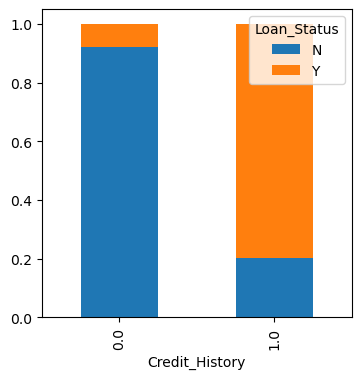

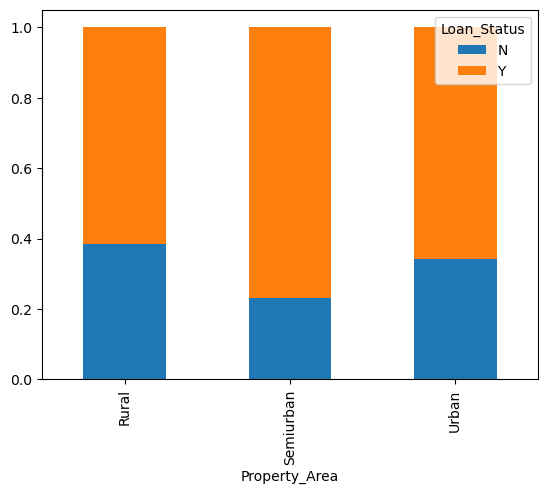

In [15]:
Credit_History=pd.crosstab(raw['Credit_History'],raw['Loan_Status']) 
Property_Area=pd.crosstab(raw['Property_Area'],raw['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

- It seems people with a credit history of 1 are more likely to get their loans approved.
- The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

#### Combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

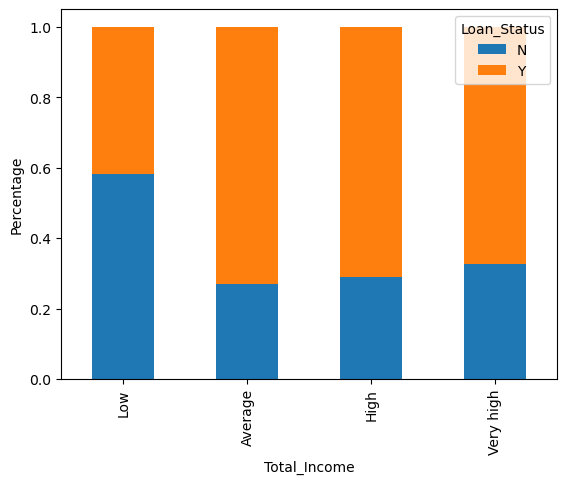

In [16]:
raw['Total_Income']=raw['ApplicantIncome']+raw['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
raw['Total_Income_bin']=pd.cut(raw['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(raw['Total_Income_bin'],raw['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

From this, we can see that the chances of getting a loan approved with a low total_income is unlikely as opposed to average, high and very high total_income.

#### Visualize Loan Amount

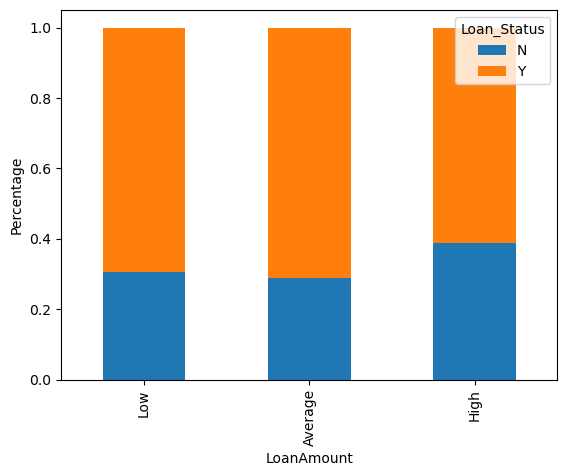

In [17]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
raw['LoanAmount_bin']=pd.cut(raw['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(raw['LoanAmount_bin'],raw['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

The data supports the hypothesis where a higher loan amount would lead to a lower chance of getting a loan approved. Low and average amounts are about the same chances.

#### Correlation between all type integer variables

In [36]:
# categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
# raw = pd.get_dummies(raw, columns=categorical_cols, drop_first=True)
# raw['Dependents'] = raw['Dependents'].replace({'3+': 3}).astype(float)
# raw = raw.dropna()

# raw['Loan_Status_Y'] = raw['Loan_Status_Y'].astype(int)
# raw['Loan_Amount_Term'] = pd.to_numeric(raw['Loan_Amount_Term'], errors='coerce').fillna(raw['Loan_Amount_Term'].median())


# matrix = raw.corr() 
# f, ax = plt.subplots(figsize=(9, 6)) 
# sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)
# plt.title('Heatmap of Correlation Matrix')
# plt.show()


'categorical_cols = [\'Gender\', \'Married\', \'Education\', \'Self_Employed\', \'Property_Area\', \'Loan_Status\']\nraw = pd.get_dummies(raw, columns=categorical_cols, drop_first=True)\nraw[\'Dependents\'] = raw[\'Dependents\'].replace({\'3+\': 3}).astype(float)\nraw = raw.dropna()\n\nraw[\'Loan_Status_Y\'] = raw[\'Loan_Status_Y\'].astype(int)\nraw[\'Loan_Amount_Term\'] = pd.to_numeric(raw[\'Loan_Amount_Term\'], errors=\'coerce\').fillna(raw[\'Loan_Amount_Term\'].median())\n\n\nmatrix = raw.corr() \nf, ax = plt.subplots(figsize=(9, 6)) \nsns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)\nplt.title(\'Heatmap of Correlation Matrix\')\nplt.show()\n'

## 5. Missing Value and Outlier Treatment

We can now impute missing values and address outliers

In [18]:
raw.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
Total_Income_bin      0
LoanAmount_bin       22
dtype: int64

The data above shows where there is missing values e.g(Gender, Married,Dependents etc)

The values above can be filled. for categorical data we can employ iputation using mode and numerical data we can employ imputation using meadian and meam. below mode is being used to fill the features 

In [19]:
raw['Gender'].fillna(raw['Gender'].mode()[0], inplace=True)
raw['Married'].fillna(raw['Married'].mode()[0], inplace=True)
raw['Dependents'].fillna(raw['Dependents'].mode()[0], inplace=True)
raw['Self_Employed'].fillna(raw['Self_Employed'].mode()[0], inplace=True)
raw['Credit_History'].fillna(raw['Credit_History'].mode()[0], inplace=True)

To fill the Loan_Amount_Term the value count of the Loan_Amount_Term will be utilized.

In [20]:
raw['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

By looking at the values above the mode is 360 therefore the missing values in this variable will be replaced using the mode of this variable.

In [40]:
raw['Loan_Amount_Term'].fillna(raw['Loan_Amount_Term'].mode()[0], inplace=True)

In order to adress the LoanAmount we can utilize the median and mean to fill the null values since it is a numerical variable. Given that the LoanAmount has outliers as seen from the previous data the median is better suited for this instance as the mean is affected by the presence of outliers.

In [21]:
raw['LoanAmount'].fillna(raw['LoanAmount'].median(), inplace=True)

raw.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income          0
Total_Income_bin      0
LoanAmount_bin       22
dtype: int64

The raw data is now filled and the same can also be done for the validation data.

In [22]:
validation['Gender'].fillna(raw['Gender'].mode()[0], inplace=True) 
validation['Dependents'].fillna(raw['Dependents'].mode()[0], inplace=True) 
validation['Self_Employed'].fillna(raw['Self_Employed'].mode()[0], inplace=True) 
validation['Credit_History'].fillna(raw['Credit_History'].mode()[0], inplace=True) 
validation['Loan_Amount_Term'].fillna(raw['Loan_Amount_Term'].mode()[0], inplace=True) 
validation['LoanAmount'].fillna(raw['LoanAmount'].median(), inplace=True)

Visualize the effect of log transformation for both the raw data and validation data:

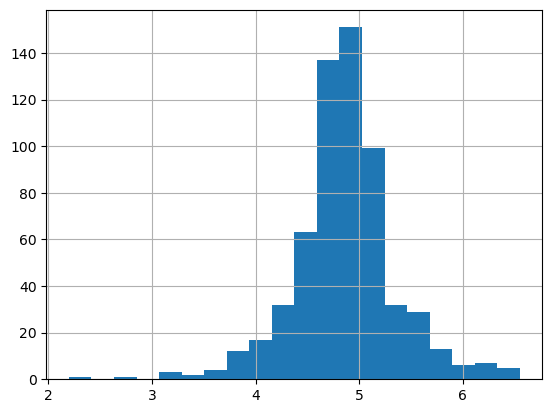

In [23]:
raw['LoanAmount_log'] = np.log(raw['LoanAmount']) 
raw['LoanAmount_log'].hist(bins=20) 
validation['LoanAmount_log'] = np.log(validation['LoanAmount'])

The visualization looks similar to a normal distribution curve. showing that the extreme values have been reduced.

## 6. Evaluation Metrics for classification problem

Without assessing the model's performance, the model-building process is not finished. How can we determine whether the model's predictions are true, assuming we have access to them? We may determine the difference between the predicted and real values by plotting the findings and comparing them with the actual values. The more accurate the predictions are, the smaller this distance is. Given that this is a classification problem, we are able to assess our models using any combination of the following metrics:

Accuracy: A tabular depiction of Actual vs. Predicted values, called a confusion matrix, can help us understand it. This represents the appearance of a confusion matrix:

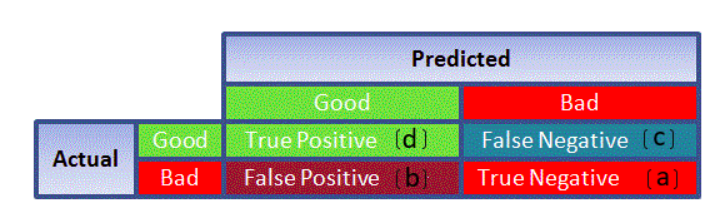

- True Positive: Targets that we have projected to be true (Y) but are in fact true (Y)

- True Negative: Targets that we expected to be false(N) but are in fact false(N)

- False Positive: Targets that we projected to be true (T) but are in fact false (N).

- False Negative: Targets that we have predicted as false(N), but are in fact true (T).

Using these values, we can calculate the accuracy of the model. The accuracy is given by:

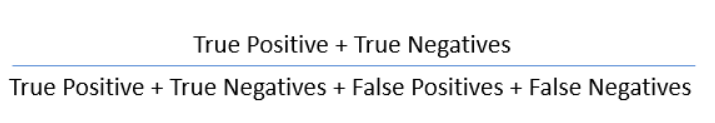

- Precision is a metric that quantifies the degree of accuracy attained in true prediction, meaning that it indicates how many observations that are reported as true actually are.

    Precision = TP / (TP + FP)

- The number of real observations that are correctly predicted, or the number of observations of the true class that have the correct label, is known as recall (sensitivity). I call it "Sensitivity" as well.

    Recall = TP / (TP + FN)

- Specificity is the ratio of accurately identified erroneous class observations to total observations.

    Specificity = TN / (TN + FP)

When determining the ROC curve, specificity and sensitivity are essential factors.

- The ROC curve

- A model's performance is summarized by the Receiver Operating Characteristic (ROC), which assesses the trade-offs between the true positive rate (sensitivity) and the false positive rate (specificity minus 1).

- The area under the curve (AUC), also called the concordance index or index of accuracy (A), is a perfect performance metric for the receiver operating characteristic curve. Better prediction ability in a model is indicated by a larger area under the curve.

This is what a ROC curve looks like:

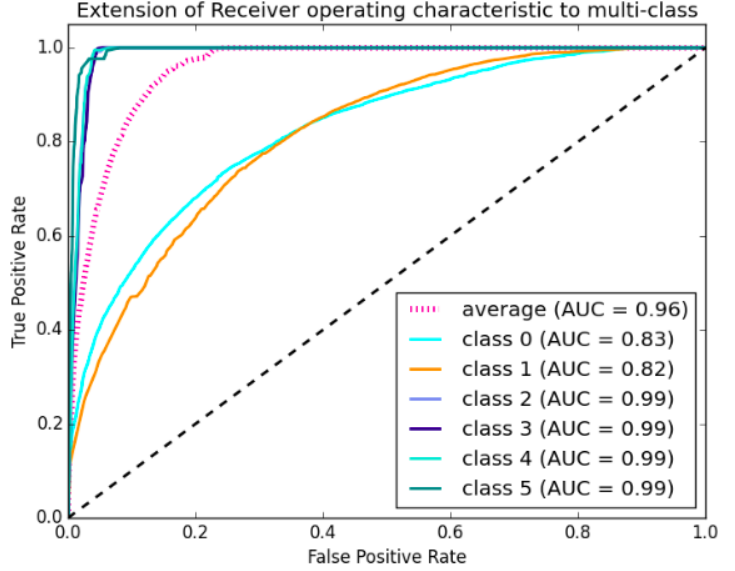

- The model's accuracy in classifying genuine positives and true negatives is indicated by the area of this curve. Predicting true classes as true and false classes as false is what we want our model to do.

- Thus, we would like the genuine positive rate to be 1. But we also care about the false positive rate in addition to the real positive rate. For instance, we want N courses to be forecasted as N in our problem, in addition to Y classes being projected as Y.

- With the example above, we want to maximize the area of the curve for classes 2, 3, 4, and 5.

- A true positive rate of approximately 0.6 is found for class 1, where the false positive rate is 0.2. However, the false-positive rate is the same for class 2, and the actual positive rate is 1. Therefore, in comparison to the AUC for class 1, the AUC for class 2 will be significantly higher. The class 2 model will therefore be superior.

- Given that their AUCs are higher, the class 2, 3, 4, and 5 models will predict with greater accuracy than the class 0 and 1 models.

On the competition’s page, it has been mentioned that our submission data would be evaluated based on accuracy. Hence, we will use accuracy as our evaluation metric.

## 7. Model building: part 1 

### Data Preparation

#### Data Separation as Features and Target

In [29]:
raw = raw.drop('Loan_ID',axis=1) 
validation = validation.drop('Loan_ID',axis=1)

features = raw.drop('Loan_Status', axis=1)
target = raw.Loan_Status

In [32]:
features = pd.get_dummies(features)
raw = pd.get_dummies(raw)
validation = pd.get_dummies(validation)

#### Data Spliting

In [46]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size =0.3, random_state=100)

### Model Building

#### Training the model

In [53]:
from sklearn.linear_model import LogisticRegression 

modlogR = LogisticRegression()
modlogR.fit(features_train, target_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Applying the model to make a prediction

In [54]:
target_modlogR_test_prediction = modlogR.predict(features_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Evaluting the Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

modlogR_test_acy_scr = accuracy_score(target_test, target_modlogR_test_prediction)
modlogR_test_mse = mean_squared_error(target_test, target_modlogR_test_prediction)
modlogR_test_r2 = r2_score(target_test, target_modlogR_test_prediction)

In [ ]:
modlogR_results = pd.DataFrame(['Logistic Regression', modlogR_test_acy_scr, modlogR_test_mse, modlogR_test_r2]).transpose()
modlogR_results.columns = ['Method', 'Testing Accuracy', 'Testing MSE', 'Testing R2']

modlogR_results

In [ ]:
pred_test = modlogR.predict(validation)